# Phase 3 - Outlier Analysis

## Columns:

**Categorical Columns**  
- make_model
- body_type
- vat
- registration_year
- previous_owners
- type
- next_inspection
- inspection_new
- body_color
- paint_type
- upholstery_color
- upholstery_material
- gearing_type
- fuel
- co2_emission
- emission_class
- drive_chain
- entertainment_media
- safety_security
- comfort_convenience
- extras
 
**Quantitative Columns**
- price
- km
- consumption_country
- consumption_city
- consumption_combined
- hp
- displacement
- warranty
- weight
- nr_of_doors
- nr_of_seats
- cylinders
- gears


---

In [832]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings;
warnings.filterwarnings("ignore")
import re
pd.set_option("display.max_columns",None)

In [833]:
auto = pd.read_csv("filled_car_data.csv")
df = auto.copy()

---

## Functions

In [834]:
def fill(method, df, column, group_cols=None):
   """
   Fills NaN values in `df[column]` either using the overall mean, median or mode (no grouping)
   or group-specific mean, median or mode (group_col provided).
   Prints stats about how many NaNs were filled and the final distribution.
   """
   # Make a copy of the dataframe to avoid modification warnings
   working_df = df.copy()
   
   # Debug prints: which column is being filled, and grouping info.
   print('Filling column:', column)
   print('Grouping by:', group_cols)
   
   # 1. Count NaNs before filling
   nan_before = working_df[column].isnull().sum()
   
   # 2. Fill logic
   if method in ['mean', 'median']:
       if group_cols is None:
           # Fill all NaN in 'column' with the overall mean/median
           working_df[column].fillna(getattr(working_df[column], method)(), inplace=True)
       else:
           # Calculate groupwise mean/median for each row
           group = working_df.groupby(group_cols)[column].transform(method)
           # Fill missing values in df[column] with corresponding group mean/median
           working_df[column].fillna(group, inplace=True)
   
   elif method == 'mode':
       if group_cols is None:
           # Fill all NaN in 'column' with the overall mode
           working_df[column].fillna(working_df[column].mode().iloc[0], inplace=True)            
       else:
           # Calculate groupwise mode for each row
           group = working_df.groupby(group_cols)[column]\
           .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
           # Fill missing values in df[column] with corresponding group mode
           working_df[column].fillna(group, inplace=True)
   
   # 3. Count NaNs after filling
   nan_after = working_df[column].isnull().sum()
   nan_filled = nan_before - nan_after
   
   # 4. Print final stats
   print("Number of NaN before filling:", nan_before)
   print("Number of NaN filled:", nan_filled)
   print("Number of NaN after filling:", nan_after)
   print("------------------")
   print(working_df[column].value_counts(dropna=False))
   
   return working_df

In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            15919 non-null  object 
 1   body_type             15919 non-null  object 
 2   price                 15919 non-null  int64  
 3   vat                   15919 non-null  object 
 4   km                    15919 non-null  float64
 5   hp                    15919 non-null  float64
 6   type                  15919 non-null  object 
 7   previous_owners       15919 non-null  float64
 8   inspection_new        15919 non-null  object 
 9   warranty              15919 non-null  float64
 10  body_color            15919 non-null  object 
 11  paint_type            15919 non-null  object 
 12  nr_of_doors           15919 non-null  float64
 13  nr_of_seats           15919 non-null  float64
 14  gearing_type          15919 non-null  object 
 15  displacement       

---

## Categorical Columns
- [] make_model
- [] body_type
- [] vat
- [] registration_year
- [] previous_owners
- [] type
- [] next_inspection
- [] inspection_new
- [] body_color
- [] paint_type
- [] upholstery_color
- [] upholstery_material
- [] gearing_type
- [] fuel
- [] co2_emission
- [] emission_class
- [] drive_chain
- [] entertainment_media
- [] safety_security
- [] comfort_convenience
- [] extras

---

## Quantitative Columns
- [x] price
- [x] km
- [] consumption_country
- [] consumption_city
- [x] consumption_combined
- [x] hp
- [x] displacement
- [x] warranty
- [x] weight
- [x] nr_of_doors
- [x] nr_of_seats
- [x] cylinders
- [x] gears

### price

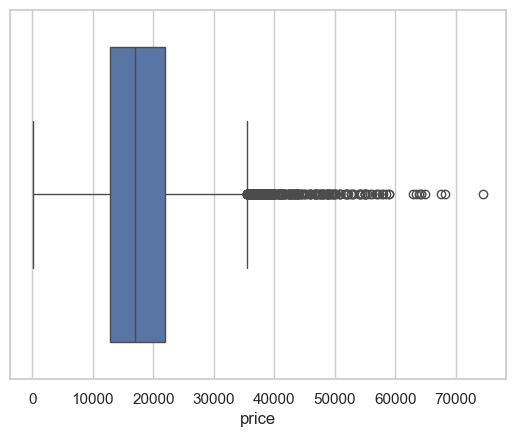

In [836]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["price"])

In [837]:
df.describe()

,price,km,hp,previous_owners,warranty,nr_of_doors,nr_of_seats,displacement,cylinders,weight,co2_emission,gears,age,consumption_combined,consumption_city,consumption_country
count,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,18019.896727,31979.540706,88.374144,0.998932,6.684654,4.660657,4.952258,1425.261574,3.786796,1349.862114,117.393178,5.948489,1.389786,4.853109,5.818355,4.211615
std,7386.169409,37057.442117,26.843513,0.326701,13.330917,0.642198,0.476599,330.882580,0.418085,211.517842,19.923387,0.713684,1.121257,1.558646,1.878240,1.134332
min,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12850.000000,1989.000000,66.000000,1.000000,0.000000,4.000000,5.000000,1229.000000,4.000000,1165.000000,104.000000,6.000000,0.000000,4.000000,4.700000,3.700000
50%,16900.000000,20413.000000,85.000000,1.000000,0.000000,5.000000,5.000000,1461.000000,4.000000,1308.000000,116.000000,6.000000,1.000000,4.750000,5.700000,4.200000
75%,21900.000000,46898.500000,101.000000,1.000000,12.000000,5.000000,5.000000,1598.000000,4.000000,1472.000000,128.000000,6.000000,2.000000,5.400000,6.800000,4.500000
max,74600.000000,317000.000000,294.000000,4.000000,72.000000,7.000000,7.000000,16000.000000,8.000000,2471.000000,990.000000,50.000000,3.000000,55.000000,66.000000,44.000000


In [838]:
df.drop((df[df.price < 4000].price.index), axis=0, inplace=True)

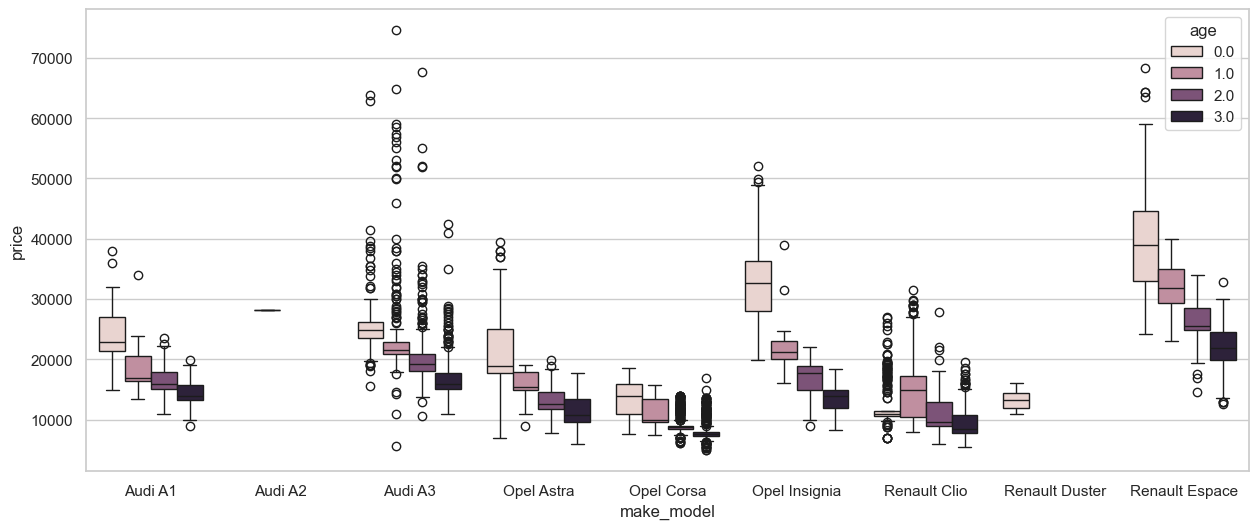

In [839]:
plt.figure(figsize=(15,6))
sns.boxplot(y='price',data=df, x='make_model', hue='age');

### km

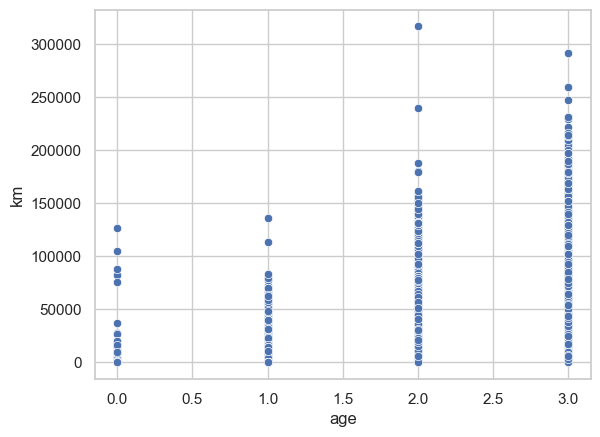

In [840]:
sns.scatterplot(data=df, x="age", y="km");

In [841]:
df.previous_owners.value_counts(dropna=False)

previous_owners
1.0    14283
0.0      835
2.0      778
3.0       17
4.0        2
Name: count, dtype: int64

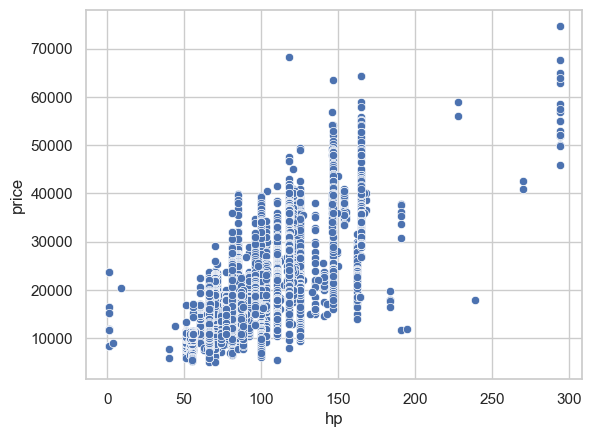

In [842]:
sns.scatterplot(data=df, x="hp", y="price");

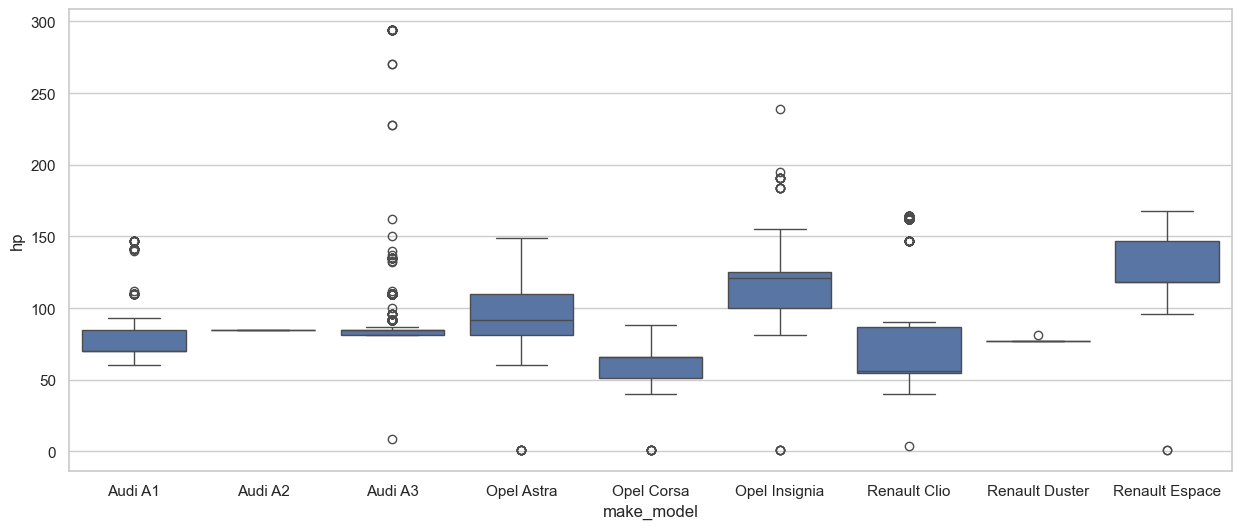

In [843]:
plt.figure(figsize=(15,6))
sns.boxplot(y='hp',data=df, x='make_model');

In [844]:
df[df['hp'] < 50].hp.value_counts(dropna=False)

hp
1.0     20
40.0     2
9.0      1
44.0     1
4.0      1
Name: count, dtype: int64

- #### Convert hp values less than 50 to null values.

In [845]:
df.loc[df['hp']<50,'hp'] = np.nan

- #### Then refill the values based on 'make_model', 'body_type' and 'displacement')

In [846]:
df = fill("mode", df, 'hp', ['make_model', 'body_type', 'displacement'])

Filling column: hp
Grouping by: ['make_model', 'body_type', 'displacement']
Number of NaN before filling: 25
Number of NaN filled: 22
Number of NaN after filling: 3
------------------
hp
85.0     2544
66.0     2122
81.0     1402
100.0    1319
110.0    1118
         ... 
75.0        1
132.0       1
239.0       1
115.0       1
195.0       1
Name: count, Length: 76, dtype: int64


In [847]:
df = fill("mode", df, 'hp', ['make_model', 'displacement'])

Filling column: hp
Grouping by: ['make_model', 'displacement']
Number of NaN before filling: 3
Number of NaN filled: 0
Number of NaN after filling: 3
------------------
hp
85.0     2544
66.0     2122
81.0     1402
100.0    1319
110.0    1118
         ... 
75.0        1
132.0       1
239.0       1
115.0       1
195.0       1
Name: count, Length: 76, dtype: int64


In [848]:
df = fill("mode", df, 'hp', ['make_model', 'displacement'])

Filling column: hp
Grouping by: ['make_model', 'displacement']
Number of NaN before filling: 3
Number of NaN filled: 0
Number of NaN after filling: 3
------------------
hp
85.0     2544
66.0     2122
81.0     1402
100.0    1319
110.0    1118
         ... 
75.0        1
132.0       1
239.0       1
115.0       1
195.0       1
Name: count, Length: 76, dtype: int64


In [849]:
df = fill("mode", df, 'hp', 'make_model')

Filling column: hp
Grouping by: make_model
Number of NaN before filling: 3
Number of NaN filled: 3
Number of NaN after filling: 0
------------------
hp
85.0     2544
66.0     2123
81.0     1402
100.0    1319
110.0    1118
         ... 
133.0       1
123.0       1
84.0        1
195.0       1
137.0       1
Name: count, Length: 75, dtype: int64


### consumption_country

### consumption_city

### consumption_combined

<Axes: xlabel='make_model', ylabel='consumption_combined'>

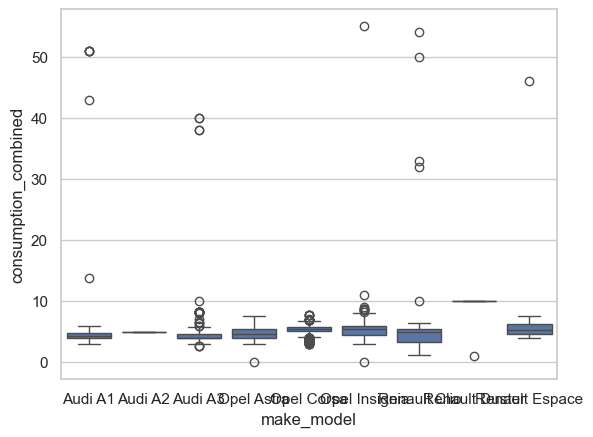

In [850]:
sns.boxplot(y='consumption_combined',data=df, x='make_model')

- #### convert 'consumption_combined' values greater than 20 and less than 3 to null and then fill according to the columns 'co2_emission' and 'displacement'

In [851]:
df.loc[(df['consumption_combined']>20)|(df['consumption_combined']<3), 'consumption_combined'] = np.nan

In [852]:
df['consumption_combined'].isnull().sum()

22

In [853]:
df = fill("mode", df, 'consumption_combined', 'co2_emission')

Filling column: consumption_combined
Grouping by: co2_emission
Number of NaN before filling: 22
Number of NaN filled: 14
Number of NaN after filling: 8
------------------
consumption_combined
3.90     962
5.60     892
4.00     731
5.40     664
5.10     638
        ... 
13.80      1
11.00      1
9.10       1
7.55       1
3.35       1
Name: count, Length: 92, dtype: int64


In [854]:
df = fill("mode", df, 'consumption_combined', 'displacement')

Filling column: consumption_combined
Grouping by: displacement
Number of NaN before filling: 8
Number of NaN filled: 8
Number of NaN after filling: 0
------------------
consumption_combined
3.90     965
5.60     892
4.00     731
5.40     665
5.10     641
        ... 
9.10       1
7.50       1
13.80      1
7.55       1
3.35       1
Name: count, Length: 91, dtype: int64


In [855]:
df['consumption_combined'].isnull().sum()

0

<Axes: xlabel='make_model', ylabel='consumption_combined'>

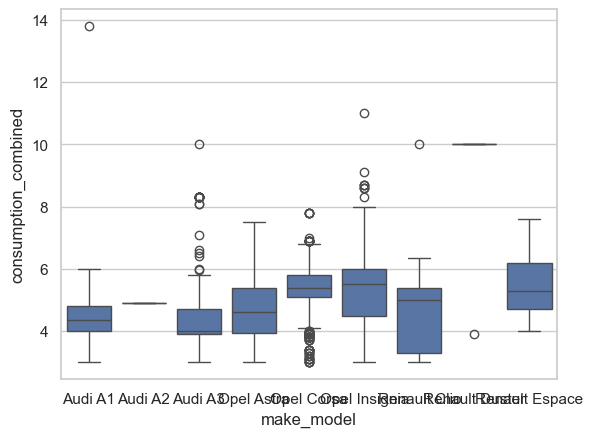

In [856]:
sns.boxplot(y='consumption_combined',data=df, x='make_model')

### hp

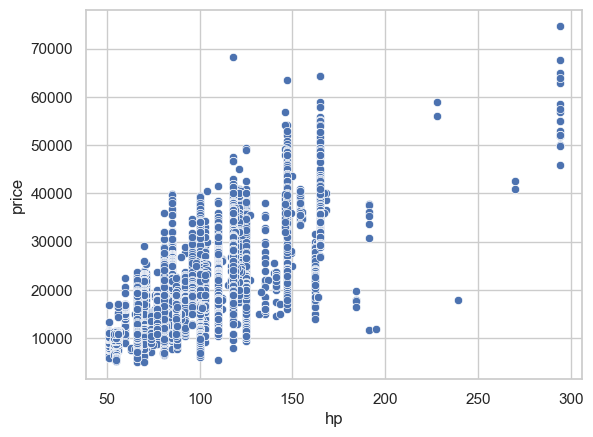

In [857]:
sns.scatterplot(data=df, x="hp", y="price");

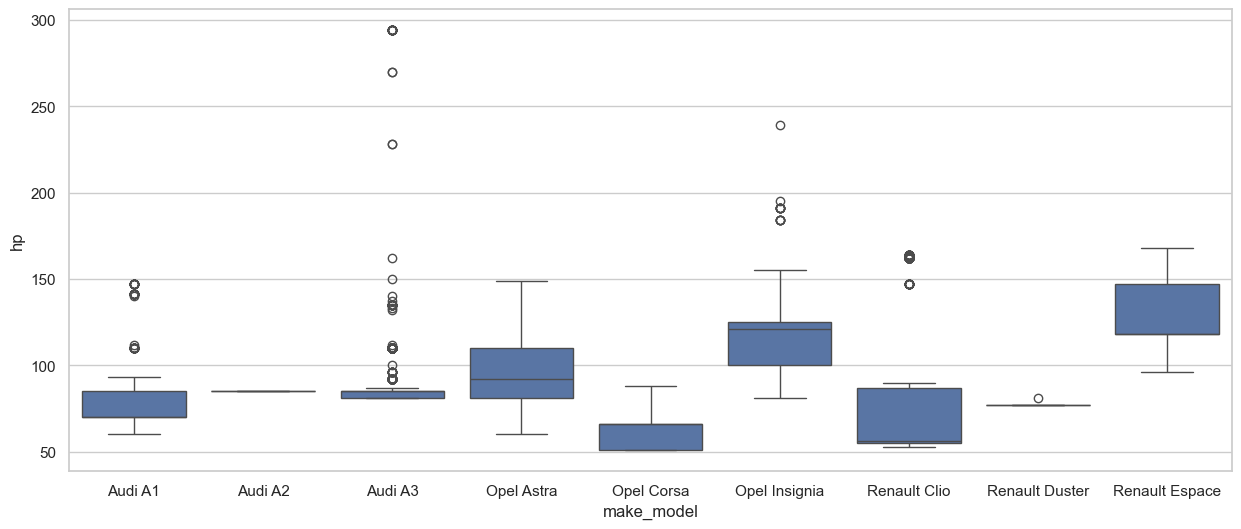

In [858]:
plt.figure(figsize=(15,6))
sns.boxplot(y='hp',data=df, x='make_model');

In [859]:
df[df['hp'] < 50]['hp']

Series([], Name: hp, dtype: float64)

### displacemenet

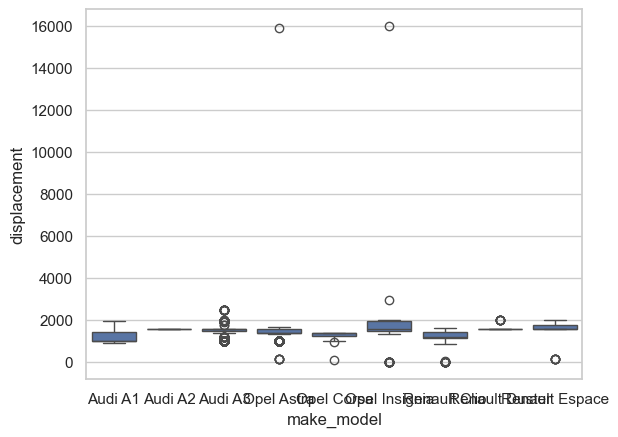

In [860]:
sns.boxplot(y='displacement',data=df, x='make_model');

- #### convert displacemet values greater than 5000 and less than 600 to null and and then fill according to the groups make_model, body_type and hp.

In [861]:
df[df['displacement'] > 5000]['displacement'] = 1600

In [862]:
df[df['displacement'] < 600]['displacement'] = np.nan

In [863]:
df = fill("mode", df, 'displacement', ['make_model','body_type','hp'])

Filling column: displacement
Grouping by: ['make_model', 'body_type', 'hp']
Number of NaN before filling: 0
Number of NaN filled: 0
Number of NaN after filling: 0
------------------
displacement
1598.0    4986
999.0     2466
1398.0    1346
1399.0     768
1229.0     709
          ... 
1390.0       1
122.0        1
1198.0       1
2967.0       1
1800.0       1
Name: count, Length: 77, dtype: int64


### warranty

In [864]:
df['warranty'].value_counts(dropna=False)

warranty
0.0     11062
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
4.0         3
1.0         3
19.0        3
34.0        3
13.0        3
28.0        2
22.0        2
14.0        2
11.0        2
46.0        2
21.0        2
9.0         2
17.0        2
45.0        2
33.0        1
40.0        1
65.0        1
10.0        1
15.0        1
7.0         1
8.0         1
56.0        1
49.0        1
47.0        1
30.0        1
Name: count, dtype: int64

### weight

<Axes: xlabel='make_model', ylabel='weight'>

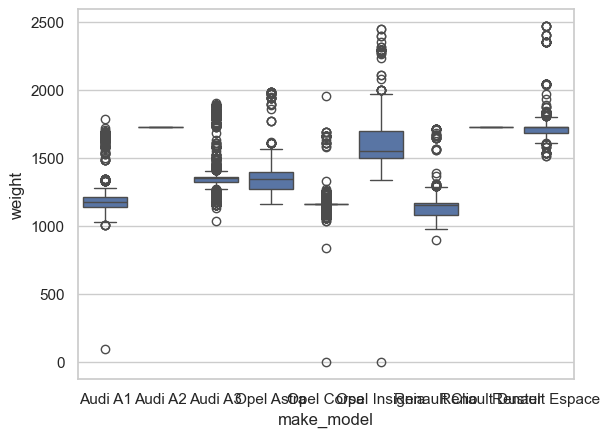

In [865]:
sns.boxplot(y='weight',data=df, x='make_model')

- #### convert values less than 600

In [866]:
df[df['weight']<500]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,warranty,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,upholstery_material,consumption_combined,consumption_city,consumption_country
1143,Audi A1,Compact,19229,VAT deductible,8263.0,70.0,Used,1.0,Yes,36.0,Beige,Metallic,5.0,4.0,Automatic,999.0,3.0,102.0,front,Benzine,102.0,Euro 6,"'Air conditioning', 'Armrest', 'Automatic clim...","'Bluetooth', 'CD player', 'Hands-free equipmen...","['Alloy wheels', 'Catalytic Converter', 'Sport...","['ABS', 'Central door lock', 'Daytime running ...",7.0,1.0,Cloth,4.60,5.6,4.0
8355,Opel Corsa,Compact,12945,VAT undeductible,2015.0,66.0,Used,1.0,Yes,0.0,Silver,Metallic,5.0,5.0,Automatic,1398.0,4.0,1.0,front,Benzine,112.0,Euro 6,"'Air conditioning', 'Electrical side mirrors',...",'Radio',['Catalytic Converter'],"['ABS', 'Central door lock', 'Daytime running ...",5.0,1.0,Cloth,4.80,5.8,4.1
12779,Opel Insignia,Station wagon,39299,VAT deductible,10.0,121.0,New,1.0,No,0.0,Black,Metallic,5.0,5.0,Manual,1500.0,4.0,1.0,front,Benzine,140.0,Euro 6,"'Heated steering wheel', 'Hill Holder', 'Park ...",NaN,"['Alloy wheels', 'Roof rack']","['Fog lights', 'Lane departure warning system']",6.0,0.0,Cloth,6.35,7.8,4.9


In [867]:
df[df['make_model'] == 'Audi A1']['weight'].mean()

1210.770466717674

In [868]:
df.loc[1143, 'weight'] = 1202

In [869]:
df[df['make_model'] == 'Opel Corsa']['weight'].mean()

1173.8628158844765

In [870]:
df.loc[8355, 'weight'] = 1169

In [871]:
df[df['make_model'] == 'Opel Insignia']['weight'].mean()

1597.111624326405

In [872]:
df.loc[12779, 'weight'] = 1508

### nr_of_doors

In [873]:
df['nr_of_doors'].value_counts(dropna=False)

nr_of_doors
5.0    11784
4.0     3079
3.0      831
2.0      219
1.0        1
7.0        1
Name: count, dtype: int64

In [874]:
df[df['nr_of_doors'] == 7.0]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,warranty,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,upholstery_material,consumption_combined,consumption_city,consumption_country
15202,Renault Espace,Van,21600,Price negotiable,78000.0,118.0,Used,1.0,No,0.0,Brown,Metallic,7.0,5.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,"'Air conditioning', 'Armrest', 'Automatic clim...","'Bluetooth', 'Digital radio', 'MP3', 'On-board...","['Alloy wheels', 'Touch screen']","['ABS', 'Blind spot monitor', 'Central door lo...",6.0,3.0,Full leather,4.6,5.0,4.4


In [875]:
df.loc[(df['make_model'] == 'Renault Espace') & (df['body_type'] == 'Van'), ['nr_of_doors']].value_counts()

nr_of_doors
5.0            712
4.0             90
7.0              1
Name: count, dtype: int64

In [876]:
df.loc[df['nr_of_doors']==1,'nr_of_doors'] = 5

In [877]:
df.loc[df['nr_of_doors']==7,'nr_of_doors'] = 5

### nr_of_seats

In [878]:
df['nr_of_seats'].value_counts(dropna=False)

nr_of_seats
5.0    14304
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: count, dtype: int64

In [879]:
df[df['nr_of_seats']==6]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,warranty,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,upholstery_material,consumption_combined,consumption_city,consumption_country
582,Audi A1,Compact,13500,VAT deductible,100000.0,70.0,Used,1.0,No,12.0,White,Metallic,5.0,6.0,Manual,1000.0,4.0,1500.0,front,Benzine,111.0,Euro 6,'Air conditioning','On-board computer',['Alloy wheels'],['ABS'],5.0,2.0,Cloth,5.1,6.0,4.2
15890,Renault Espace,Station wagon,42490,VAT deductible,2000.0,147.0,New,1.0,No,0.0,Black,Metallic,5.0,6.0,Automatic,1997.0,4.0,1840.0,front,Diesel,168.0,Euro 6,"'Air conditioning', 'Armrest', 'Automatic clim...","'Bluetooth', 'Hands-free equipment', 'On-board...","['Alloy wheels', 'Touch screen']","['ABS', 'Blind spot monitor', 'Central door lo...",6.0,0.0,Cloth,5.7,6.1,5.3


In [880]:
df.loc[df['nr_of_seats']==3,'nr_of_seats'] = 4

### cylinders

<Axes: xlabel='make_model', ylabel='cylinders'>

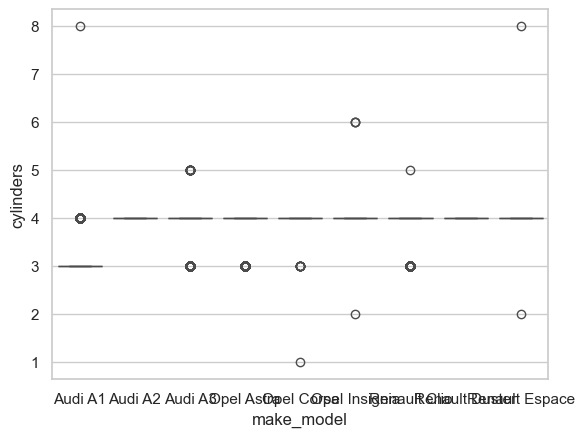

In [881]:
sns.boxplot(y='cylinders',data=df, x='make_model')

In [882]:
df.cylinders.value_counts(dropna=False)

cylinders
4.0    12464
3.0     3421
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: count, dtype: int64

In [883]:
df.loc[df.cylinders == 8.0, 'cylinders'] = 4

In [884]:
df.cylinders.value_counts(dropna=False)

cylinders
4.0    12466
3.0     3421
5.0       22
6.0        3
2.0        2
1.0        1
Name: count, dtype: int64

In [885]:
df[(df.cylinders == 2.0) | (df.cylinders == 1.0)]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,warranty,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,upholstery_material,consumption_combined,consumption_city,consumption_country
9956,Opel Corsa,Compact,16625,VAT deductible,100.0,66.0,Pre-registered,1.0,No,0.0,Black,Metallic,3.0,5.0,Automatic,1398.0,1.0,1163.0,front,Benzine,140.0,Euro 6,"'Air conditioning', 'Automatic climate control...","'Bluetooth', 'Digital radio', 'Hands-free equi...","['Alloy wheels', 'Sport suspension']","['ABS', 'Central door lock', 'Daytime running ...",6.0,0.0,Cloth,6.00,7.8,4.9
11342,Opel Insignia,Station wagon,21900,VAT deductible,13600.0,100.0,Employee's car,1.0,No,0.0,Grey,Metallic,5.0,5.0,Automatic,1598.0,2.0,1701.0,front,Diesel,114.0,Euro 6,"'Air conditioning', 'Armrest', 'Automatic clim...","'Bluetooth', 'Digital radio', 'Hands-free equi...","['Alloy wheels', 'Catalytic Converter', 'Touch...","['ABS', 'Central door lock with remote control...",6.0,1.0,Part leather,4.45,5.0,3.9
15835,Renault Espace,Van,47590,VAT deductible,6000.0,147.0,Employee's car,1.0,No,0.0,Black,Metallic,5.0,7.0,Automatic,1997.0,2.0,1840.0,front,Diesel,139.0,Euro 6,"'Air conditioning', 'Automatic climate control...","'Bluetooth', 'Hands-free equipment', 'On-board...",['Voice Control'],"['ABS', 'Alarm system', 'Blind spot monitor', ...",6.0,0.0,Full leather,5.30,6.2,4.7


In [886]:
df.loc[df.cylinders == 2.0, 'cylinders'] = 4

In [887]:
df.loc[df.cylinders == 1.0, 'cylinders'] = 4

### gears

- #### assign gear values less than 5 to 5.

In [888]:
df.gears.value_counts(dropna=False)

gears
6.0     10506
5.0      3238
7.0      1933
8.0       224
9.0         6
1.0         2
3.0         2
4.0         2
2.0         1
50.0        1
Name: count, dtype: int64

In [889]:
df.loc[df[df['gears']<5].index, 'Gears'] = 5